In [1]:
from maad.features import tfsd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(-1.0994713695023444, 1.0999748271191592, -8.7988923235301, 8.7988923235301)

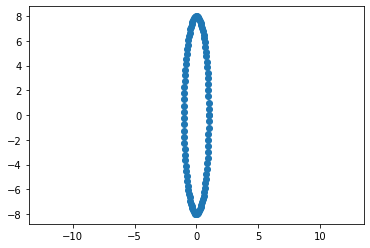

In [3]:
def ellipsePoints(a, b, nbPoints):
    
    t_list = np.linspace(0, 2*np.pi, nbPoints)
    x = [a*np.cos(t) for t in t_list]
    y = [b*np.sin(t) for t in t_list]
    
    return x, y


x, y = ellipsePoints(1, 8, 100)

plt.scatter(x, y)
plt.axis('equal')

In [4]:
def maxPertinence(x, y):
    N = len(x)
    max_ij = (0, 0)
    max_p = 0
    
    for i in range(N):
        for j in range(i):
            p = (x[i]**2 + y[i]**2)*(x[j]**2 + y[j]**2)
            if p > max_p:
                max_p = p
                max_ij = (i, j)
    
    return max_ij


def maxDiversite(x, y):
    N = len(x)
    min_ij = (0, 0)
    min_d = 2
    
    for i in range(N):
        for j in range(i):
            d = abs((x[i]*x[j] + y[i]*y[j])/((x[i]**2 + y[i]**2)*(x[j]**2 + y[j]**2)))
            if d < min_d:
                min_d = d
                min_ij = (i, j)
    
    return min_ij


def dpp(x, y):
    N = len(x)
    p = np.zeros([N, N]);
    
    for i in range(N):
        for j in range(N):
            p[i, j] = np.linalg.det(np.array([[x[i], y[i]], [x[j], y[j]]]))
            
    i, j = np.where(p == np.max(p))
    i, j = i[0], j[0]
    
    return i, j

(array([ 1,  9, 10, 13, 14, 15, 19, 21, 28, 31, 32, 38, 40, 46, 53, 57, 63,
       77, 79, 82, 86, 88, 94], dtype=int64), array([26, 34, 35, 38, 39, 40, 44, 46, 53, 56, 57, 63, 65, 71, 78, 82, 88,
        3,  5,  8, 12, 14, 20], dtype=int64))


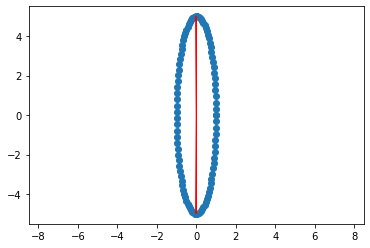

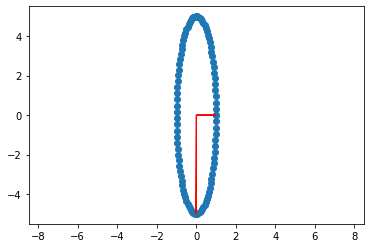

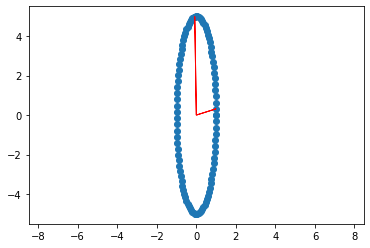

In [127]:
x, y = ellipsePoints(1, 5, 100)

# Perimetre max
i1, j1 = maxPertinence(x, y)
# Angle min
i2, j2 = maxDiversite(x, y)
# Aire max
i3, j3 = dpp(x, y)

np.linalg.det(np.array([[x[test1], y[test1]], [x[test2], y[test2]]]))


plt.scatter(x, y)
plt.arrow(0, 0, x[i1], y[i1], color = 'r')
plt.arrow(0, 0, x[j1], y[j1], color = 'r')
plt.axis('equal')
plt.show()

plt.scatter(x, y)
plt.arrow(0, 0, x[i2], y[i2], color = 'r')
plt.arrow(0, 0, x[j2], y[j2], color = 'r')
plt.axis('equal')
plt.show()

plt.scatter(x, y)
plt.arrow(0, 0, x[i3], y[i3], color = 'r')
plt.arrow(0, 0, x[j3], y[j3], color = 'r')
plt.axis('equal')
plt.show()